In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import os

In [13]:
filepath = r"E:\world_bank_development_indicators.csv"
data = pd.read_csv(filepath, index_col=["country", "date"], parse_dates=True)
data.head()

C:\Users\HURSH\AppData\Local\Temp\ipykernel_66720\730454181.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filepath, index_col=["country", "date"], parse_dates=True)


agricultural_land%  forest_land%  land_area  \
country     date                                                      
Afghanistan 1960-01-01                 NaN           NaN        NaN   
            1961-01-01           57.801696           NaN   652230.0   
            1962-01-01           57.893688           NaN   652230.0   
            1963-01-01           57.970348           NaN   652230.0   
            1964-01-01           58.066940           NaN   652230.0   

                        avg_precipitation  trade_in_services%  \
country     date                                                
Afghanistan 1960-01-01                NaN                 NaN   
            1961-01-01              327.0                 NaN   
            1962-01-01              327.0                 NaN   
            1963-01-01              327.0                 NaN   
            1964-01-01              327.0                 NaN   

                        control_of_corruption_estimate  \
country     date                                         
Afghanistan 1960-01-01                             NaN   
            1961-01-01                             NaN   
            1962-01-01                             NaN   
            1963-01-01                             NaN   
            1964-01-01                             NaN   

                        control_of_corruption_std  access_to_electricity%  \
country     date                                                            
Afghanistan 1960-01-01                        NaN                     NaN   
            1961-01-01                        NaN                     NaN   
            1962-01-01                        NaN                     NaN   
            1963-01-01                        NaN                     NaN   
            1964-01-01                        NaN                     NaN   

                        renewvable_energy_consumption%  \
country     date                                         
Afghanistan 1960-01-01                             NaN   
            1961-01-01                             NaN   
            1962-01-01                             NaN   
            1963-01-01                             NaN   
            1964-01-01                             NaN   

                        electric_power_consumption  ...  \
country     date                                    ...   
Afghanistan 1960-01-01                         NaN  ...   
            1961-01-01                         NaN  ...   
            1962-01-01                         NaN  ...   
            1963-01-01                         NaN  ...   
            1964-01-01                         NaN  ...   

                        multidimensional_poverty_headcount_ratio%  gini_index  \
country     date                                                                
Afghanistan 1960-01-01                                        NaN         NaN   
            1961-01-01                                        NaN         NaN   
            1962-01-01                                        NaN         NaN   
            1963-01-01                                        NaN         NaN   
            1964-01-01                                        NaN         NaN   

                        birth_rate  death_rate  life_expectancy_at_birth  \
country     date                                                           
Afghanistan 1960-01-01      50.340      31.921                    32.535   
            1961-01-01      50.443      31.349                    33.068   
            1962-01-01      50.570      30.845                    33.547   
            1963-01-01      50.703      30.359                    34.016   
            1964-01-01      50.831      29.867                    34.494   

                        population  rural_population  \
country     date                                       
Afghanistan 1960-01-01   8622466.0         7898093.0   
            1961-01-01   8790140.

In [14]:
gdp = pd.read_csv(filepath, index_col=["country", "date"], usecols=["country", "date", "GDP_current_US"], parse_dates=True)
gdp.head()

C:\Users\HURSH\AppData\Local\Temp\ipykernel_66720\2094043226.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp = pd.read_csv(filepath, index_col=["country", "date"], usecols=["country", "date", "GDP_current_US"], parse_dates=True)


GDP_current_US
country     date                      
Afghanistan 1960-01-01    5.377778e+08
            1961-01-01    5.488889e+08
            1962-01-01    5.466667e+08
            1963-01-01    7.511112e+08
            1964-01-01    8.000000e+08

In [15]:
afg_gdp = gdp.loc["Afghanistan"]
afg_gdp.head()

,GDP_current_US
date,
1960-01-01,5.377778e+08
1961-01-01,5.488889e+08
1962-01-01,5.466667e+08
1963-01-01,7.511112e+08
1964-01-01,8.000000e+08


In [17]:
print("Missing Values for Afganistan:", afg_gdp.isna().sum())

Missing Values for Afganistan: GDP_current_US    21
dtype: int64


In [18]:
afg_gdp = afg_gdp.ffill()
print("Missing values for Afganistan:", afg_gdp.isna().sum())

Missing values for Afganistan: GDP_current_US    0
dtype: int64


<Axes: xlabel='date', ylabel='GDP_current_US'>

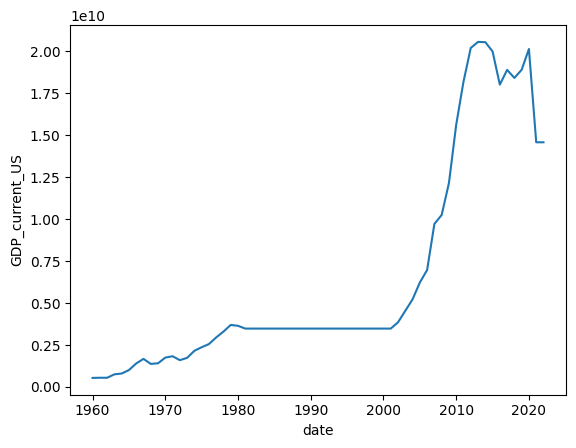

In [19]:
sns.lineplot(x=afg_gdp.index, y=afg_gdp.GDP_current_US)

In [24]:
afg_gdp = np.log(afg_gdp)
afg_gdp = afg_gdp.rename(columns={"GDP_current_US": "log(GDP_current_US)"})

<Axes: xlabel='date', ylabel='log(GDP_current_US)'>

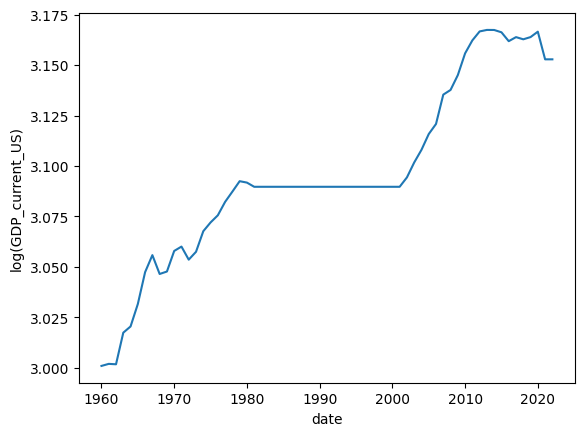

In [25]:
sns.lineplot(x=afg_gdp.index, y=afg_gdp.loc[:, "log(GDP_current_US)"])

In [30]:
afg_gdp["prev_log(GDP_current_US)"] = afg_gdp.shift()
afg_gdp = afg_gdp.dropna()
afg_gdp.head()

ValueError: Columns must be same length as key